#***Project Title : Rich VS Poor***
---



##***1.Description***
---
* **Purpose:** Predict whether a person is Rich or Poor.

* **Problem Type:** Binary Classification (Target → Rich / Poor).

* **Size:** 22,792 rows × 16 columns.

* **Target Column:** Predictions (Rich / Poor).

###**Main Features:**

* age – Age of the individual.

* Working Section – Employment type (Private, Govt, Self-employed, etc.).

* Financial Weight – Economic weight/score.

* education & education-num – Highest education level and its numeric form.

* Marriage Status – Marital condition (Married, Divorced, etc.).

* occupation – Type of job.

* Relationship Status – Role in household (Husband, Wife, Child, etc.).

* Skin Color – Ethnic/race category.

* Gender – Male/Female.

* Capital Gain / Capital Loss – Additional financial indicators.

* hours-per-week – Weekly working hours.

* Country – Native country.

* id – Unique identifier.

---

##***2.Important Libraries***
---
*Libraries are pre-written collections of functions and tools that simplify programming tasks.*

####**Insights**:

* pandas, numpy → Data manipulation & analysis.

* matplotlib, seaborn → Data visualization.

* sklearn, imblearn → Machine Learning & preprocessing.

* warnings → Suppress unnecessary alerts.
---

In [8]:
# used to avoid warnigs
import warnings
warnings.filterwarnings('ignore')

# used for data manuplation and analysis
import pandas as pd
import numpy as np

# used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#used for perform veriours functions to perform Classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Evulation function
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  classification_report
from sklearn import metrics

##***3.Load and Read dataset***
---
*Loading dataset means importing raw data (CSV file) into Python for analysis.*

####**Insights:**

* pd.read_csv() loads the dataset into a DataFrame.

* Shape = 22792 rows × 16 columns.

* Columns include demographics (age, gender, Skin Color) and Predictions(Target) etc

---

In [11]:
#Loaad Dataset
df = pd.read_csv('/content/richvspoor.zip')
# Read dataset
df

age       Working Section  Financial Weight     education  \
0       48               Private            138970     Bachelors   
1       21       State Govenment             96483  Some-college   
2       49               Private            228583       HS-grad   
3       40               Private            130760     Assoc-voc   
4       55      Local Government            223716  Some-college   
...    ...                   ...               ...           ...   
22787   33  Self Employed No Inc            123424     Bachelors   
22788   38               Private            218729       HS-grad   
22789   33  Self Employed No Inc             62932       HS-grad   
22790   41               Private            155657          11th   
22791   25      Local Government             45474     Bachelors   

       education-num   Marriage Status         occupation Relationship Status  \
0                 13  Married Civilian    Exec-managerial             Husband   
1                 10       No Marriage       Adm-clerical           Own-child   
2                  9          Divorced      Other-service           Unmarried   
3                 11  Married Civilian    Exec-managerial             Husband   
4                 10          Divorced    Exec-managerial       Not-in-family   
...              ...               ...                ...                 ...   
22787             13  Married Civilian    Exec-managerial             Husband   
22788              9          Divorced      Other-service       Not-in-family   
22789              9  Married Civilian       Craft-repair             Husband   
22790              7       No Marriage  Handlers-cleaners      Other-relative   
22791             13  Married Civilian     Prof-specialty             Husband   

               Skin Color  Gender  Capital Gain  Capital Loss  hours-per-week  \
0                   White    Male             0             0              45   
1      Asian-Pac-Islander  Female             0             0              12   
2                   White    Male             0             0              40   
3                   White    Male             0             0              50   
4      Amer-Indian-Eskimo  Female             0             0              40   
...                   ...     ...           ...           ...             ...   
22787               White    Male             0             0              40   
22788               White  Female             0             0              25   
22789               White    Male             0             0              40   
22790               Black  Female             0             0              40   
22791               White    Male             0             0              60   

             Country     id Predictions  
0      United-States   6900        Rich  
1      United-States  27355        Poor  
2           Columbia  12701        Poor  
3      United-States    782        Rich  
4      United-States  20462        Poor  
...              ...    ...         ...  
22787  United-States    958        Rich  
22788  United-States  19469        Poor  
22789  United-States  27174        Poor  
22790  United-States  15888        Poor  
22791  United-States  29624        Poor  

[22792 rows x 16 columns]

##***4.Data Exploration***
---
*Exploration is the first step of EDA to understand dataset size, structure, and features.*

####**Insights:**

* df.head() → previews first rows.

* df.info() → shows column types & non-null values.

* df.shape & columns → total row and columns & columns name

* df.describe() → summary stats for numerical columns.

* df.dtypes → all columnms data types

* value_counts() → check value counts of categorical columns

* Seprate integer , float and categorical columns
---

In [12]:
# show first 5 rows
df.head()

age   Working Section  Financial Weight     education  education-num  \
0   48           Private            138970     Bachelors             13   
1   21   State Govenment             96483  Some-college             10   
2   49           Private            228583       HS-grad              9   
3   40           Private            130760     Assoc-voc             11   
4   55  Local Government            223716  Some-college             10   

    Marriage Status       occupation Relationship Status          Skin Color  \
0  Married Civilian  Exec-managerial             Husband               White   
1       No Marriage     Adm-clerical           Own-child  Asian-Pac-Islander   
2          Divorced    Other-service           Unmarried               White   
3  Married Civilian  Exec-managerial             Husband               White   
4          Divorced  Exec-managerial       Not-in-family  Amer-Indian-Eskimo   

   Gender  Capital Gain  Capital Loss  hours-per-week        Country     id  \
0    Male             0             0              45  United-States   6900   
1  Female             0             0              12  United-States  27355   
2    Male             0             0              40       Columbia  12701   
3    Male             0             0              50  United-States    782   
4  Female             0             0              40  United-States  20462   

  Predictions  
0        Rich  
1        Poor  
2        Poor  
3        Rich  
4        Poor

In [13]:
# Show total rows and columns
print("Rows and columns: ",df.shape)
# Show all columns
print("\nAll Columns:",df.columns)

Rows and columns:  (22792, 16)

All Columns: Index(['age', 'Working Section', 'Financial Weight', 'education',
       'education-num', 'Marriage Status', 'occupation', 'Relationship Status',
       'Skin Color', 'Gender', 'Capital Gain', 'Capital Loss',
       'hours-per-week', 'Country', 'id', 'Predictions'],
      dtype='object')


In [14]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  22792 non-null  int64 
 1   Working Section      22792 non-null  object
 2   Financial Weight     22792 non-null  int64 
 3   education            22792 non-null  object
 4   education-num        22792 non-null  int64 
 5   Marriage Status      22792 non-null  object
 6   occupation           22792 non-null  object
 7   Relationship Status  22792 non-null  object
 8   Skin Color           22792 non-null  object
 9   Gender               22792 non-null  object
 10  Capital Gain         22792 non-null  int64 
 11  Capital Loss         22792 non-null  int64 
 12  hours-per-week       22792 non-null  int64 
 13  Country              22792 non-null  object
 14  id                   22792 non-null  int64 
 15  Predictions          22792 non-null  object
dtypes: i

In [15]:
# summary stats for numerical columns.
df.describe()

age  Financial Weight  education-num  Capital Gain  \
count  22792.000000      2.279200e+04   22792.000000  22792.000000   
mean      38.555414      1.898584e+05      10.076737   1053.415716   
std       13.619696      1.059323e+05       2.582573   7223.331352   
min       17.000000      1.228500e+04       1.000000      0.000000   
25%       28.000000      1.177652e+05       9.000000      0.000000   
50%       37.000000      1.786055e+05      10.000000      0.000000   
75%       47.000000      2.377320e+05      12.000000      0.000000   
max       90.000000      1.484705e+06      16.000000  99999.000000   

       Capital Loss  hours-per-week            id  
count  22792.000000    22792.000000  22792.000000  
mean      86.643603       40.441032  16329.344024  
std      402.098547       12.316680   9395.807754  
min        0.000000        1.000000      0.000000  
25%        0.000000       40.000000   8252.750000  
50%        0.000000       40.000000  16343.500000  
75%        0.000000       45.000000  24472.250000  
max     4356.000000       99.000000  32560.000000

In [16]:
# data type of all columns
df.dtypes

age                     int64
Working Section        object
Financial Weight        int64
education              object
education-num           int64
Marriage Status        object
occupation             object
Relationship Status    object
Skin Color             object
Gender                 object
Capital Gain            int64
Capital Loss            int64
hours-per-week          int64
Country                object
id                      int64
Predictions            object
dtype: object

In [17]:
# seprate integer , Float and categorical columns
cat_cols = df.select_dtypes(include= ['object']).columns.tolist()
num_cols = df.select_dtypes(include= ['int64']).columns.tolist()
float_cols = df.select_dtypes(include= ['float64']).columns.tolist()

print("Categorical columns:",cat_cols)
print("\nNumerical columns:",num_cols)
print("\nFloat columns:",float_cols)

Categorical columns: ['Working Section', 'education', 'Marriage Status', 'occupation', 'Relationship Status', 'Skin Color', 'Gender', 'Country', 'Predictions']

Numerical columns: ['age', 'Financial Weight', 'education-num', 'Capital Gain', 'Capital Loss', 'hours-per-week', 'id']

Float columns: []


In [18]:
cat_cols = ['Working Section', 'education', 'Marriage Status', 'occupation', 'Relationship Status', 'Skin Color', 'Gender', 'Country', 'Predictions']
#Value colums of Categorical columns
for i in cat_cols:
  print(df[i].value_counts())

Working Section
Private                 15895
Self Employed No Inc     1798
Local Government         1459
?                        1266
State Govenment           943
Self Employed + Inc       771
Police                    647
No Pay                      9
Never Worked                4
Name: count, dtype: int64
education
HS-grad         7307
Some-college    5112
Bachelors       3742
Masters         1213
Assoc-voc        955
11th             831
Assoc-acdm       750
10th             651
7th-8th          460
Prof-school      414
9th              364
12th             311
Doctorate        286
5th-6th          237
1st-4th          126
Preschool         33
Name: count, dtype: int64
Marriage Status
Married Civilian             10520
No Marriage                   7458
Divorced                      3097
Separated                      720
Widowed                        688
Married but Spouse Absent      292
Married to Army Official        17
Name: count, dtype: int64
occupation
Prof-specialty    

##***5.Data Cleaning***
---
*Cleaning prepares raw data by removing errors, duplicates, and handling missing values.*

####**Insights:**

* No found missing values

* No found duplicatyes values

* Dataset is relatively clean.

---

In [19]:
#Check missing values
df.isnull().sum()

age                    0
Working Section        0
Financial Weight       0
education              0
education-num          0
Marriage Status        0
occupation             0
Relationship Status    0
Skin Color             0
Gender                 0
Capital Gain           0
Capital Loss           0
hours-per-week         0
Country                0
id                     0
Predictions            0
dtype: int64

In [20]:
#Check duplicated values
print(df.duplicated().sum())

0


## 6.***EDA (Exploratory Data Analysis)***
________________________________________________________________________________________________________________________

*EDA is the process of visualizing and summarizing data to detect trends, patterns, and outliers.*

####**Insights:**

* Target Variable (Predictions):

  * Rich → 4589 (24%)

  * Poor → 17303 (75%) → dataset is imbalanced.

* Bar plots and count plots show distribution of categorical features.

---

###Check Categorical Target Column
---

In [22]:
#Check Categorical Target Column
df['Predictions']

0        Rich
1        Poor
2        Poor
3        Rich
4        Poor
         ... 
22787    Rich
22788    Poor
22789    Poor
22790    Poor
22791    Poor
Name: Predictions, Length: 22792, dtype: object

### Check value counts and percentage of target column
---

In [25]:
#Check value counts of target
df.Predictions.value_counts()

Predictions
Poor    17303
Rich     5489
Name: count, dtype: int64

In [27]:
# check Check value counts
df.Predictions.value_counts(normalize = True)

Predictions
Poor    0.75917
Rich    0.24083
Name: proportion, dtype: float64

### Vertical Bar Plot
________________________________________________________________________________________________________________________
####*We use a bar plot when we want to compare counts or values across different categories in dataset.*
---

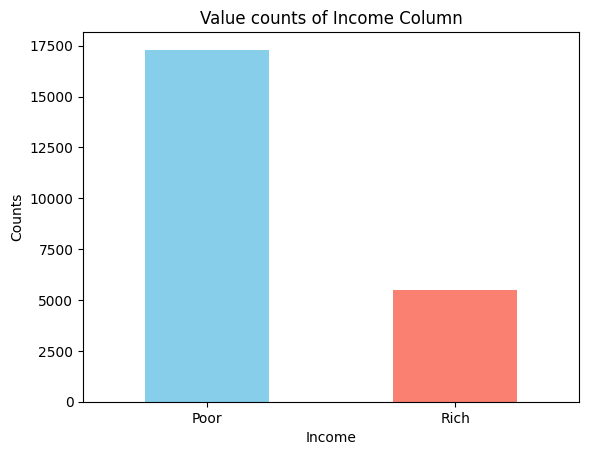

In [28]:
#bar plot to check value counts of target
df.Predictions.value_counts().plot(kind = 'bar', color = ['skyblue', 'salmon'])
plt.title('Value counts of Income Column')
plt.xlabel('Income')
plt.xticks(rotation = 0)
plt.ylabel('Counts')
plt.show()

###Count Plot
---
#####*We use a bar plot when we want to compare counts or values across different categories in dataset.*
---

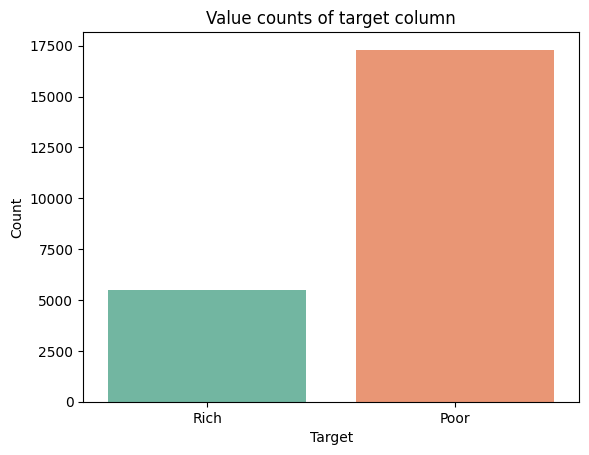

In [29]:
# Check balance or imbalance count of target
sns.countplot(x='Predictions', data=df, palette='Set2')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Value counts of target column')
plt.show()

###Pie Chart
---
*A pie chart displays the proportion of each category in a variable as slices of a circle, showing percentage distribution.*

---

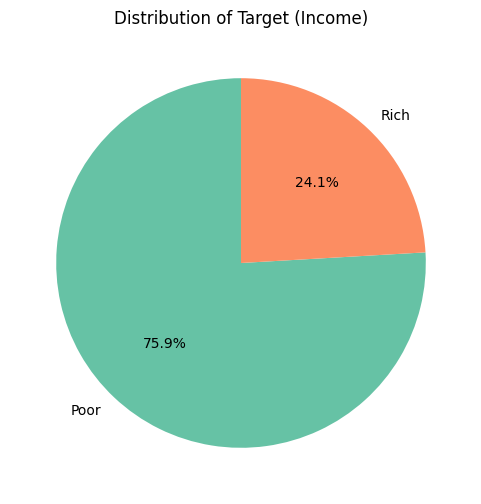

In [31]:
# Pie chart for target column
plt.figure(figsize=(6,6))
df['Predictions'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Distribution of Target (Income)')
plt.ylabel('')  # removes y-label for cleaner look
plt.show()


##***7.Label Encoding of all object columns***
---
*Label Encoding converts categorical text values into numeric codes for ML models.*

####**Insights:**

* Columns like Gender → Male = 1, Female = 0.

* Target column Predictions → Poor vs Rich

* Makes dataset ML-ready.
---

In [32]:
#label encoding of all columns
col = ['Working Section', 'education', 'Marriage Status', 'occupation', 'Relationship Status', 'Skin Color', 'Gender', 'Country', 'Predictions']
for col in col:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

df

age  Working Section  Financial Weight  education  education-num  \
0       48                5            138970          9             13   
1       21                8             96483         15             10   
2       49                5            228583         11              9   
3       40                5            130760          8             11   
4       55                1            223716         15             10   
...    ...              ...               ...        ...            ...   
22787   33                7            123424          9             13   
22788   38                5            218729         11              9   
22789   33                7             62932         11              9   
22790   41                5            155657          1              7   
22791   25                1             45474          9             13   

       Marriage Status  occupation  Relationship Status  Skin Color  Gender  \
0                    1           4                    0           4       1   
1                    4           1                    3           1       0   
2                    0           8                    4           4       1   
3                    1           4                    0           4       1   
4                    0           4                    1           0       0   
...                ...         ...                  ...         ...     ...   
22787                1           4                    0           4       1   
22788                0           8                    1           4       0   
22789                1           3                    0           4       1   
22790                4           6                    2           2       0   
22791                1          10                    0           4       1   

       Capital Gain  Capital Loss  hours-per-week  Country     id  Predictions  
0                 0             0              45       39   6900            1  
1                 0             0              12       39  27355            0  
2                 0             0              40        4  12701            0  
3                 0             0              50       39    782            1  
4                 0             0              40       39  20462            0  
...             ...           ...             ...      ...    ...          ...  
22787             0             0              40       39    958            1  
22788             0             0              25       39  19469            0  
22789             0             0              40       39  27174            0  
22790             0             0              40       39  15888            0  
22791             0             0              60       39  29624            0  

[22792 rows x 16 columns]

##***8.Plots & Visualization***
---
*Visualizations help in interpreting patterns and feature relationships.*

---

### Pairplot
_________________________________________________________________________________________________________________________
#### *Pairplot scatterplot matix shows relationships between all numarical variables in dataset. It creates scatter plots for every possible pair of variables, and histograms on the diagonal to show distributions.*

---

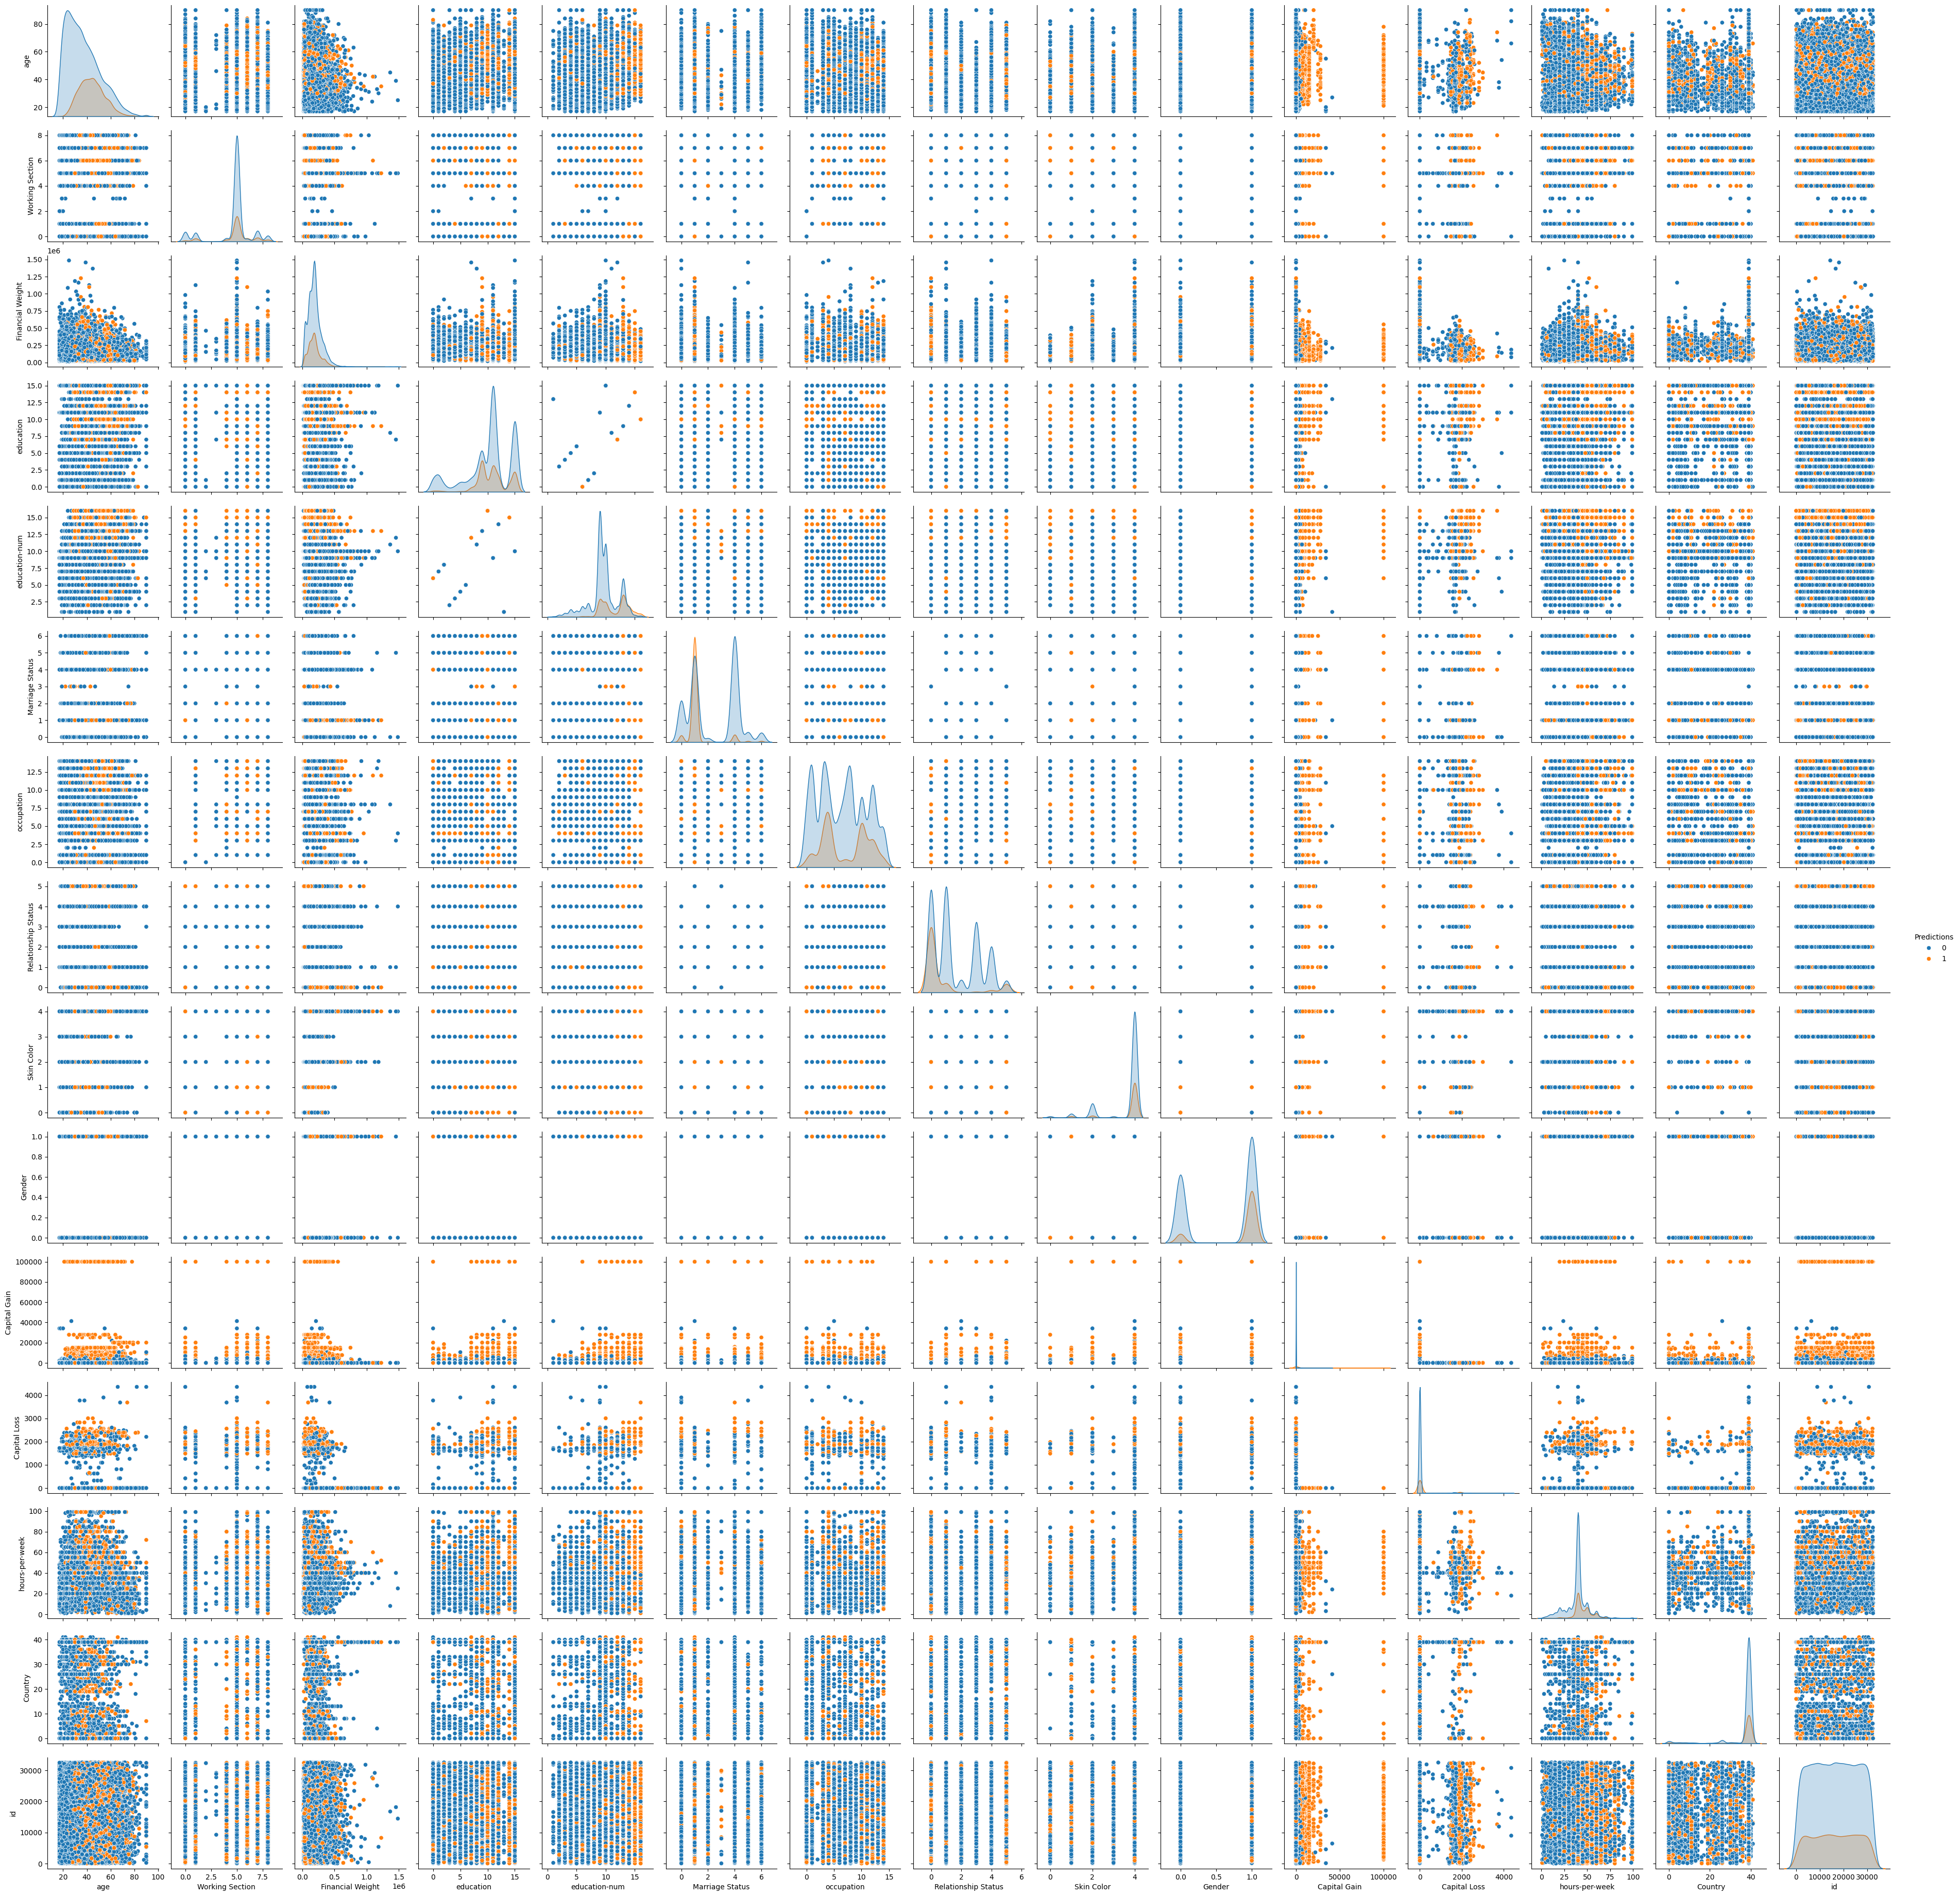

In [33]:
#pair plot all numarical features
sns.pairplot(df,hue = 'Predictions')

### Scatter Plot
_____________________________________________________________________________________________________________________
#### *Scatter plot shows reationship between two variables by plotting data points as dots on an X–Y plane. It helps to see trends, patterns, or clusters between those two variables.*
__________________________________________________________________________________________________________________________

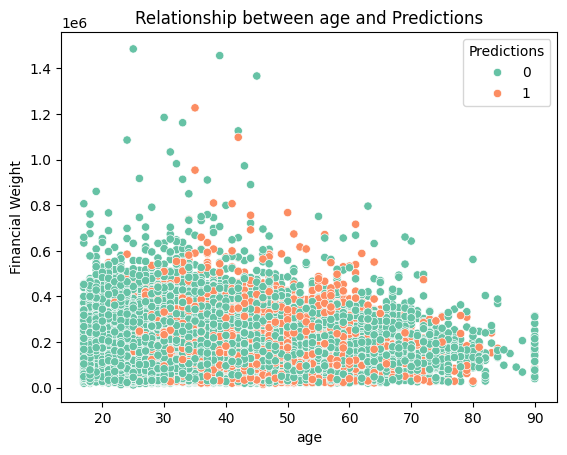

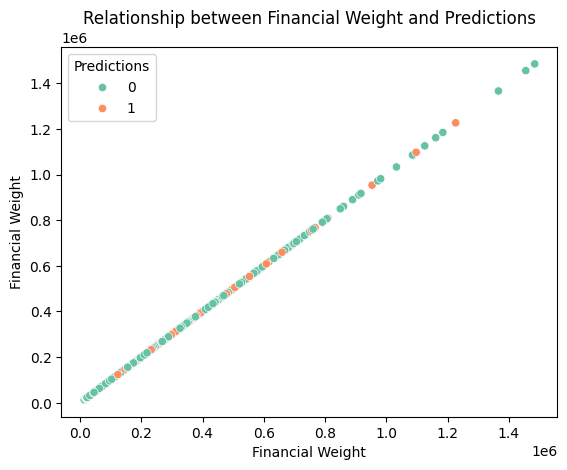

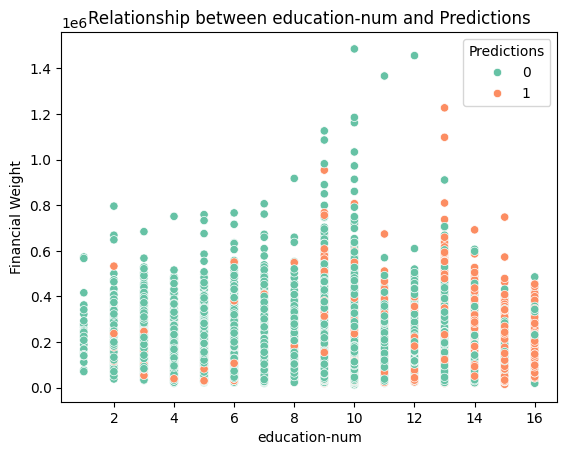

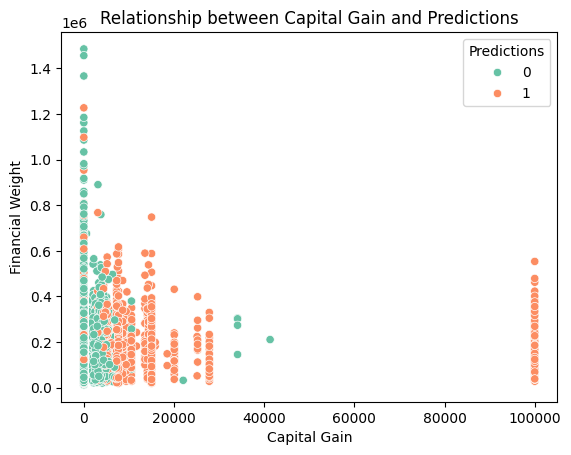

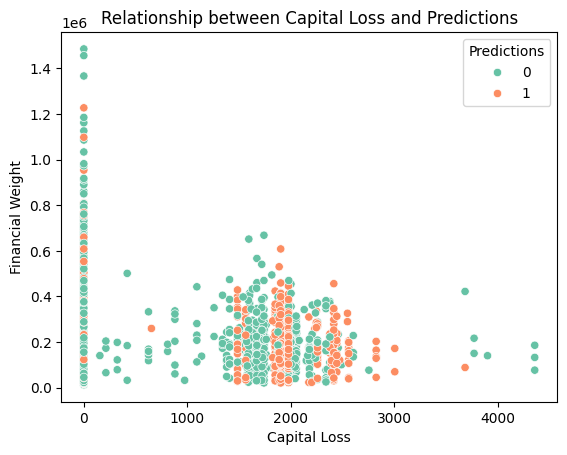

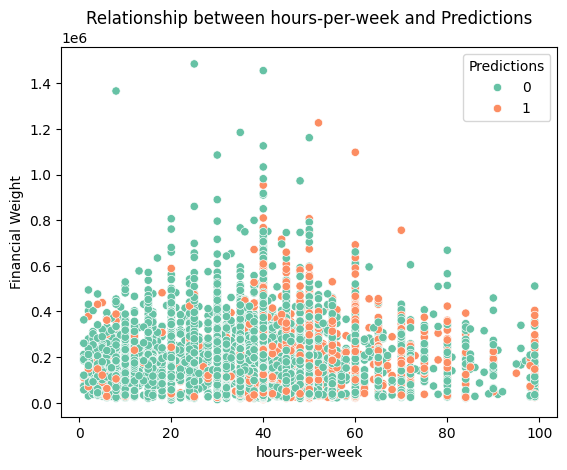

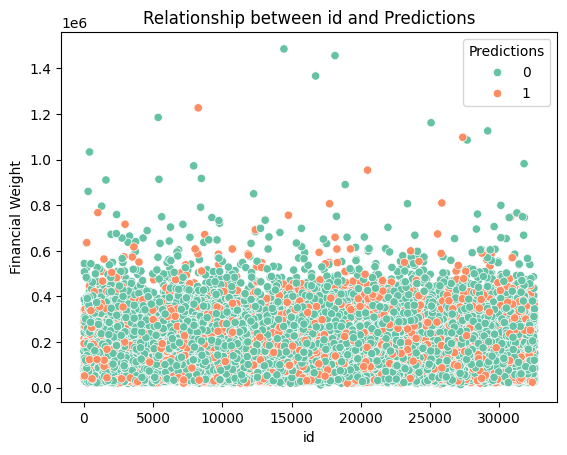

In [36]:
#Scatter plot between two variables
num_cols =['age', 'Financial Weight', 'education-num', 'Capital Gain', 'Capital Loss', 'hours-per-week', 'id']

#The loop is used to automatically generate scatter plots for each numerical column
for col in num_cols:
    sns.scatterplot(x=col, y='Financial Weight', data=df, hue='Predictions', palette='Set2')
    plt.title(f"Relationship between {col} and Predictions")
    plt.show()


###Count Plot
---
A count plot is a type of bar plot that shows the frequency (count) of each category in a categorical variable.

---

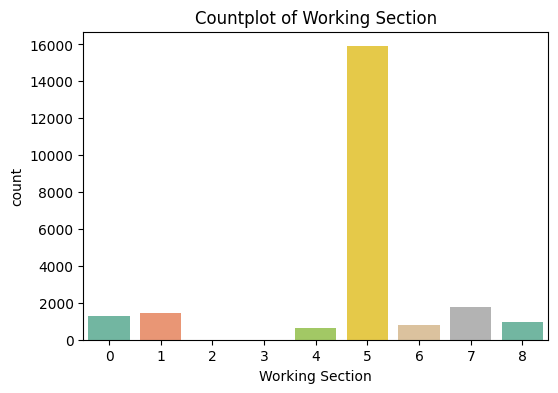

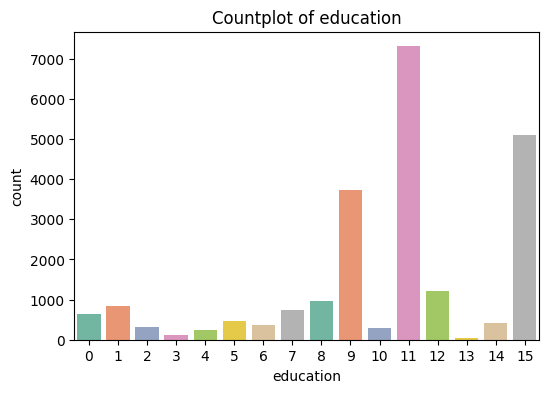

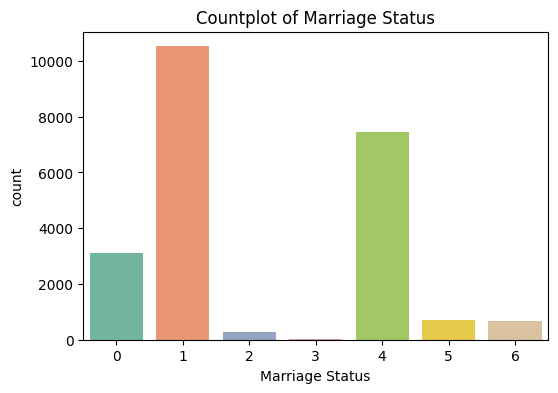

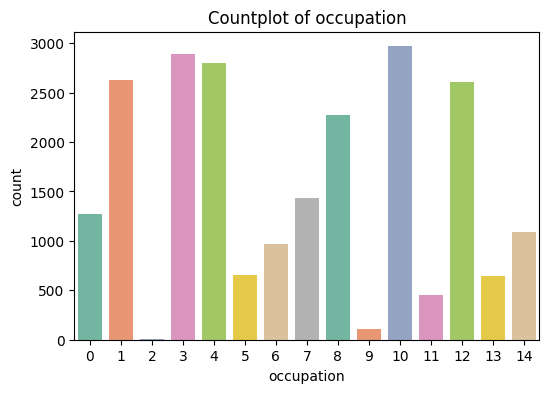

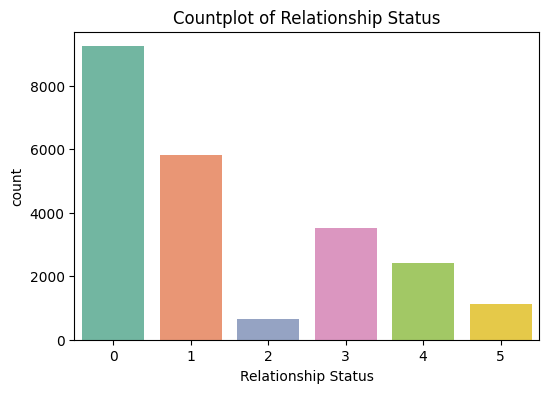

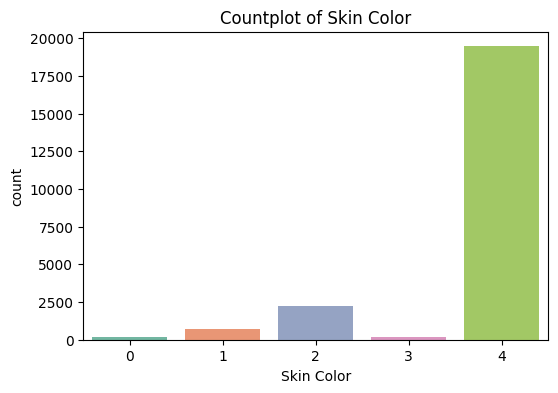

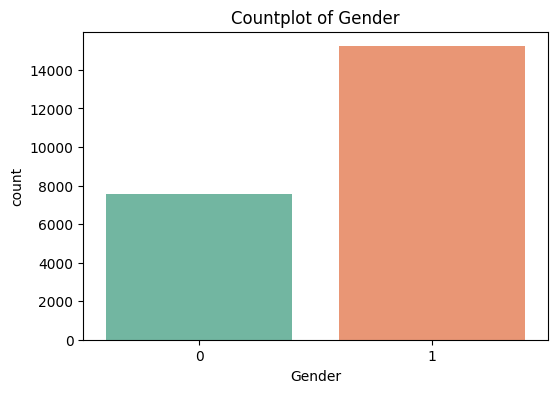

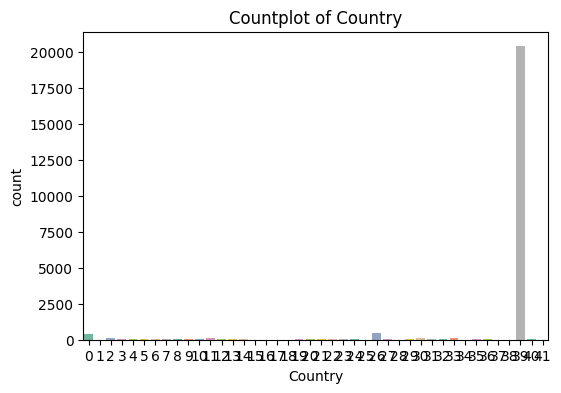

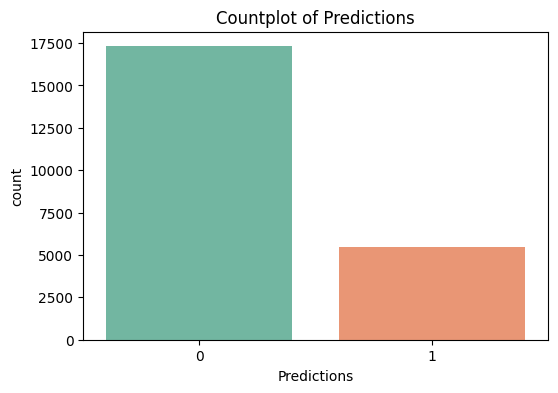

In [37]:
#Count Plot of Categorical Columns
cat_cols = ['Working Section', 'education', 'Marriage Status', 'occupation', 'Relationship Status', 'Skin Color', 'Gender', 'Country', 'Predictions']

#The loop is used to automatically generate count plots for each categorical column
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f'Countplot of {col}')
    plt.show()

##***9.Relationship Between Numerical Features***
_________________________________________________________________________________________________________________________

###Correlation Heatmap
____________________________________________________________________________________________________________________
####*This heatmap shows the pairwise correlation between numerical features of the dataset.*



In [ ]:
#check Correlation
df.corr()

In [ ]:
# ========= correlation matrix ==============
plt.figure(figsize = (15,15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'Blues')
plt.title("Correlation of Rich vs Poor dataset")
plt.show()

##***10.Feature & Target Separation***
---
*X contains independent variables (predictors).*

*y contains the dependent variable (Predictions).*

---

In [43]:
#Traget & features sepreation
Y = df['Predictions']
X = df.drop(columns = ['Predictions', 'id'])

##***11.Over Sampling Using SMOTE***
---
SMOTE (Synthetic Minority Over-sampling Technique) balances class distribution by generating synthetic samples.

###**Insights:**

* Original: 75% Poor, 24% rich.

* After SMOTE: Balanced 50/50 dataset.

* Prevents models from being biased toward majority class.

---

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 45)
X_re, Y_re = smote.fit_resample(X,Y)

##***12.Train-Test Split***
__________________________________________________________________________________________________________________________
*The function train_test_split is used to divide a dataset into two parts: a training set and a testing set. The parameter test_size=0.20 means 20% of the data is used for testing, while 80% is used for training.
X_test.shape shows how many samples and features are present in the test dataset after splitting.*

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X_re,Y_re,test_size = 0.20, random_state= 45)

X_test.shape

(6922, 14)

In [45]:
print("X train shape:",X_train.shape)
print("Y train shape:",Y_train.shape)
print("X test shape:",X_test.shape)
print("Y test shape:",Y_test.shape)

X train shape: (27684, 14)
Y train shape: (27684,)
X test shape: (6922, 14)
Y test shape: (6922,)


In [46]:
X.columns

Index(['age', 'Working Section', 'Financial Weight', 'education',
       'education-num', 'Marriage Status', 'occupation', 'Relationship Status',
       'Skin Color', 'Gender', 'Capital Gain', 'Capital Loss',
       'hours-per-week', 'Country'],
      dtype='object')

In [47]:
X_train.head()

age  Working Section  Financial Weight  education  education-num  \
32553   39                5            104936         12             12   
14930   34                1            213722         11              9   
2226    44                7            264740         14             15   
9480    38                5            210866         11              9   
7745    28                6             32922          8             11   

       Marriage Status  occupation  Relationship Status  Skin Color  Gender  \
32553                1           4                    0           4       1   
14930                1          11                    0           4       1   
2226                 1          10                    0           4       1   
9480                 1           4                    0           4       1   
7745                 4          12                    1           4       1   

       Capital Gain  Capital Loss  hours-per-week  Country  
32553             0             0              40       39  
14930             0             0              57       39  
2226              0             0              40       39  
9480              0             0              44       39  
7745              0             0              60       39

##***13.Comparison Before And After SMOTE***
---
*Visual comparison to check how balancing affects dataset distribution.*

###**Insights:**

* Before SMOTE → Highly imbalanced.

* After SMOTE → Equal distribution of target labels.

---

In [48]:
df[['Predictions']]

Predictions
0                1
1                0
2                0
3                1
4                0
...            ...
22787            1
22788            0
22789            0
22790            0
22791            0

[22792 rows x 1 columns]

###Before Applying SMOTE
---

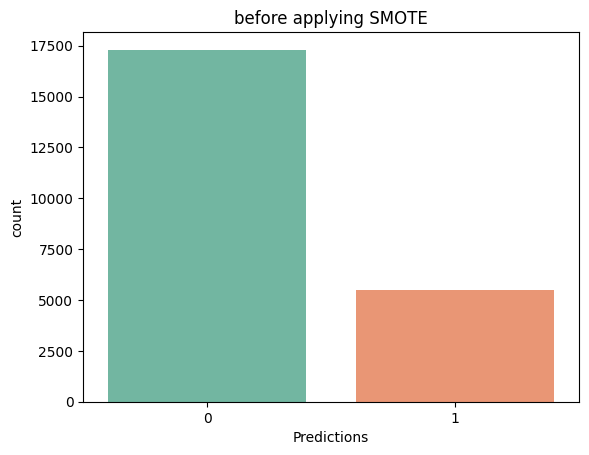

In [50]:
sns.countplot(x = 'Predictions', data = df, palette = 'Set2')
plt.title("before applying SMOTE")
plt.show()

###After Applying SMOTE
---

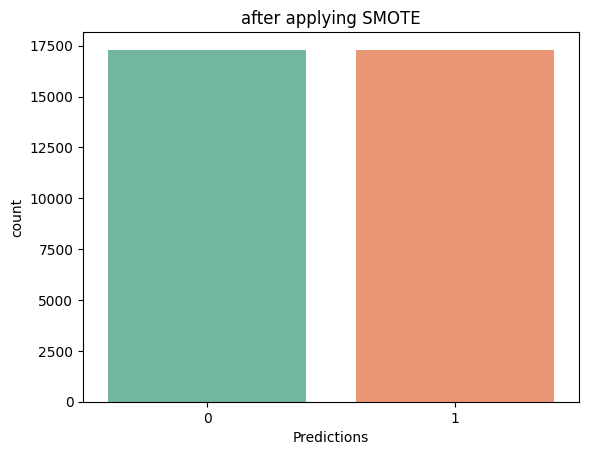

In [53]:
Y_re_df = pd.DataFrame(Y_re, columns = ['Predictions'])
sns.countplot(x = 'Predictions', data = Y_re_df, palette= 'Set2')
plt.title("after applying SMOTE")
plt.show()

##***14.Model Training***
---

*We apply multiple regression models:*

###**1.Logistic Regression**

*A linear model that estimates probabilities for binary classigication using the sigmoid function to classify outcomes.Soft max function for multi class classification using ONE VS REST*

###**2.Gaussian Naive Bayes:**

*Based on Bayes’ theorem, assumes feature independence and uses Gaussian distribution for probability.*

###**3.Decision Tree:**

*Splits data into branches based on feature values, leading to class labels at the leaf nodes.*

###**4.K-Nearest Neighbors (KNN):**

*Classifies a new data point based on the majority class of its k nearest neighbors using distance metrics.*

###**5.Support Vector Machine (SVM):**

*Finds the optimal hyperplane that separates classes with maximum margin close to hyperplane are support vectors.*
###**5.Random Forest:**

*An ensemble of multiple decision trees where each tree votes, and the majority determines the final prediction.*

---

In [54]:
# ====================== MDEOL TRAING =============================
# ===================== Models Dictionary =========================
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                  Gaussian Naive Bayes": GaussianNB(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                Support Vector Machine": SVC(),
    "                          RandomForest": RandomForestClassifier()
}

#Dictionary to store results
results = {}

#Loop through models
for name , model in models.items():
  model.fit(X_train, Y_train)
  print(name + "Trained.")


                   Logistic RegressionTrained.
                  Gaussian Naive BayesTrained.
                         Decision TreeTrained.
                   K-Nearest NeighborsTrained.
                Support Vector MachineTrained.
                          RandomForestTrained.


##***15.Accuracy***
---
*Accuracy = % of correct predictions made by the model.*

###**Insights:**

* Logistic Regression → 69.10%

* Naive Bayes → 62.77%

* Decision Tree → 84.93%

* KNN → 70.89%

* SVM → 58.87%

* Random Forest → 88.92% (best)

---

In [55]:
# Loop through all models stored in the dictionary 'models'
for name, model in models.items():

  #calculate accuracy of each model
  accuracy = model.score(X_test, Y_test)*100
  #print accuracy
  print(name + ":{:.2f}%".format(accuracy))
  # Store the accuracy results in the dictionary
  results[name] = accuracy

                   Logistic Regression:69.10%
                  Gaussian Naive Bayes:62.77%
                         Decision Tree:84.93%
                   K-Nearest Neighbors:70.85%
                Support Vector Machine:58.87%
                          RandomForest:88.82%


##***16.Model Accuracy Comparision With Bar Chart***
---
*Comparing multiple models shows which performs best on the dataset.
Convert results dictionary into DataFrame (results_df).
Print table of models with their accuracies.
Plot horizontal bar chart for visual comparison.
Add labels, colors, and title for clarity.*

###**Insights:**

* Random Forest outperformed all others.

* Decision Tree also performed well.

* Logistic Regression gave baseline performance.

---


 ======= Model Comparision: =======
                                    Model   Accuracy
0                     Logistic Regression  69.098526
1                    Gaussian Naive Bayes  62.770875
2                           Decision Tree  84.932101
3                     K-Nearest Neighbors  70.846576
4                  Support Vector Machine  58.870269
5                            RandomForest  88.818261


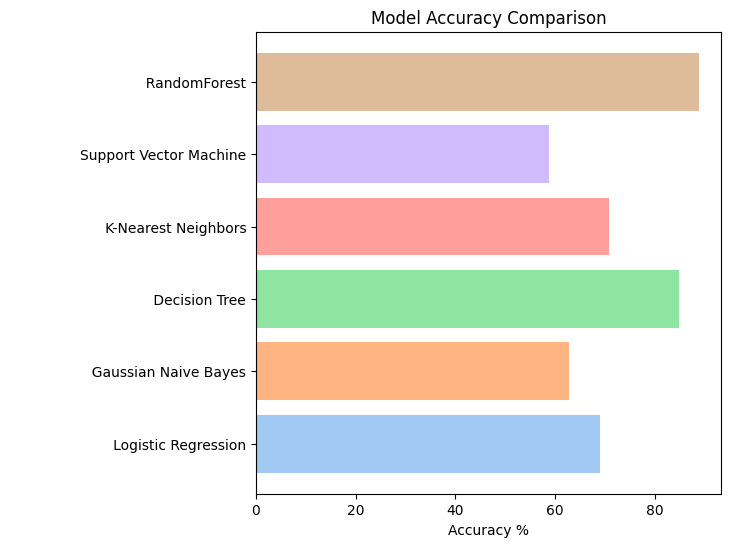

In [56]:
#Convert to data frame
results_df = pd.DataFrame(list(results.items()), columns = ["Model", "Accuracy"])

#Display accuracy
print("\n ======= Model Comparision: =======")
print(results_df)

#Bar Chart for comparision
plt.figure(figsize = (6,6))
colors = sns.color_palette('pastel')
plt.barh(results_df["Model"], results_df['Accuracy'], color = colors)
plt.xlabel("Accuracy %")
plt.title("Model Accuracy Comparison")
plt.show()

##***17.Model Accuracy Comparison using Pie Chart***
---
*pie chart shows the accuracy proportion of each model. Bigger slices represent models with higher accuracy, making it easy to compare performance at a glance.*

---


 ======= Model Comparision: =======
                                    Model   Accuracy
0                     Logistic Regression  69.098526
1                    Gaussian Naive Bayes  62.770875
2                           Decision Tree  84.932101
3                     K-Nearest Neighbors  70.846576
4                  Support Vector Machine  58.870269
5                            RandomForest  88.818261


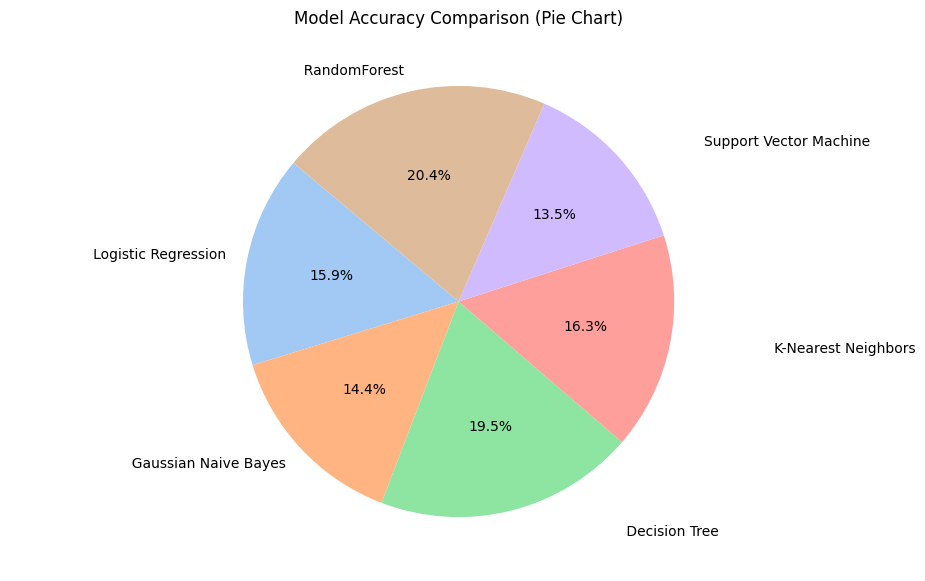

In [59]:
# =============== PIE CHART ===================
# Convert to data frame
results_df = pd.DataFrame(list(results.items()), columns = ["Model", "Accuracy"])

# Display accuracy table
print("\n ======= Model Comparision: =======")
print(results_df)

# Pie Chart for comparison
plt.figure(figsize=(7,7))
colors = sns.color_palette('pastel')
plt.pie(
    results_df['Accuracy'],
    labels=results_df['Model'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("Model Accuracy Comparison (Pie Chart)")
plt.show()


##***18.Confusion Matrix & Heatmap***
---
*Confusion Matrix shows counts of True Positives, False Positives, True Negatives, False Negatives*.

###**Insights:**

* Random Forest had balanced precision & recall.

* SVM predicted majority class correctly but failed minority class.

---

Confusion Matrix
[[2595  833]
 [1306 2188]]


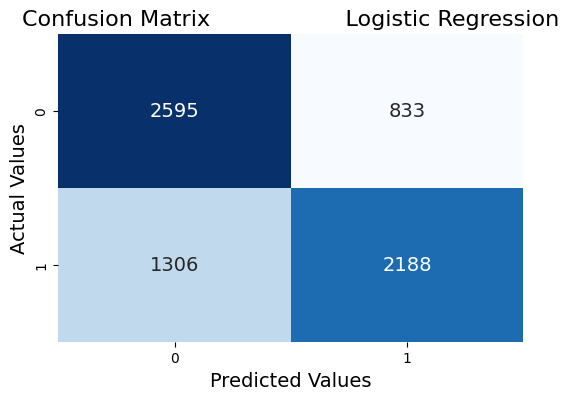

Confusion Matrix
[[3264  164]
 [2413 1081]]


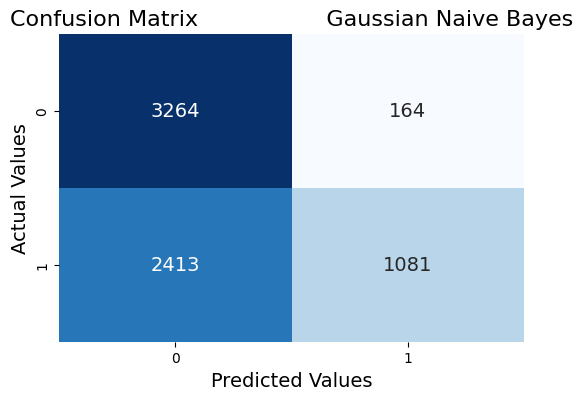

Confusion Matrix
[[2893  535]
 [ 508 2986]]


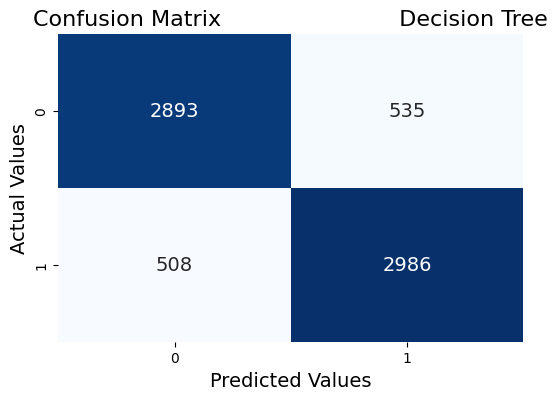

Confusion Matrix
[[2291 1137]
 [ 881 2613]]


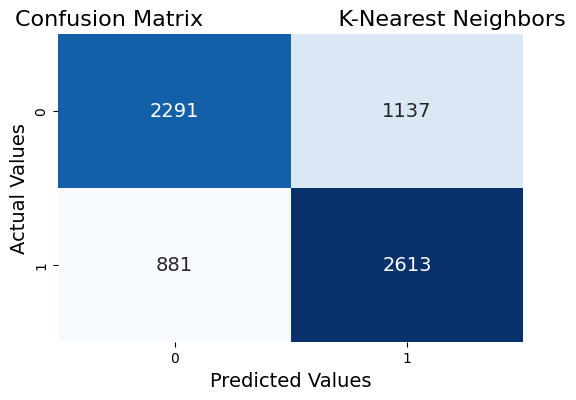

Confusion Matrix
[[3400   28]
 [2819  675]]


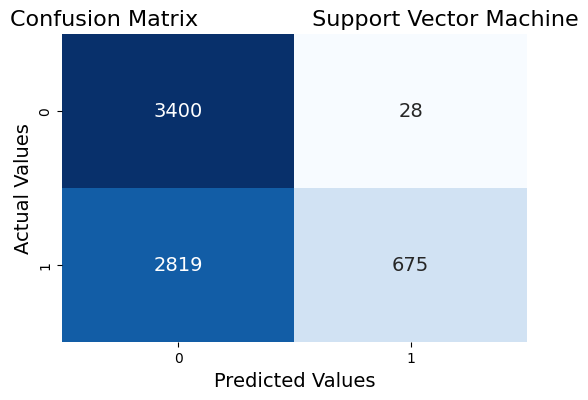

Confusion Matrix
[[3057  371]
 [ 403 3091]]


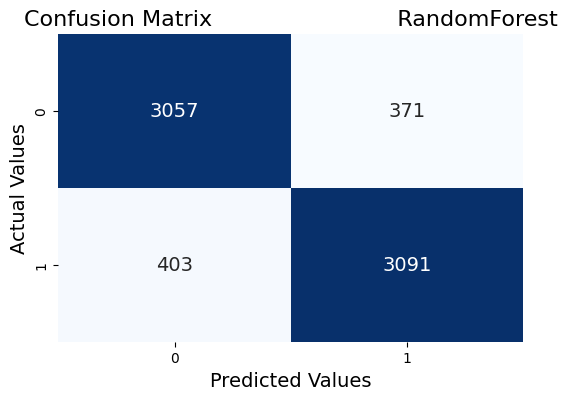

In [57]:
#=============== CONFUSION MATRIX =======================
# Loop through all models stored in the dictionary 'models'.
for name, model in models.items():
  Y_pred = model.predict(X_test)
  print("Confusion Matrix")
  cm = confusion_matrix(Y_test, Y_pred)
  print(cm)

  # =============== HEATMAP ======================
  plt.figure (figsize = (6, 4))
  sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues", cbar = False, annot_kws = {'size': 14})
  plt.xlabel('Predicted Values', fontsize = 14)
  plt.ylabel('Actual Values', fontsize = 14)
  plt.title("Confusion Matrix" + name, fontsize = 16)
  plt.show()

##***19.Classification Report***
---
*Report with precision, recall, and F1-score for each class.*

###**Insights:**

* Random Forest: Best overall (precision & recall ≈ 0.89).

* Decision Tree: Balanced performance (≈0.85).

* Naive Bayes & SVM struggled with minority class detection.

---

In [58]:
#=============== CLASSIFICATION REPORT =======================
# Loop through all models stored in the dictionary 'models'
for name , model in models.items():
  print(f"\n ========= {name} =========")
  Y_pred = model.predict(X_test)
  print(classification_report(Y_test, Y_pred))


 =========                    Logistic Regression =========
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      3428
           1       0.72      0.63      0.67      3494

    accuracy                           0.69      6922
   macro avg       0.69      0.69      0.69      6922
weighted avg       0.70      0.69      0.69      6922


 =========                   Gaussian Naive Bayes =========
              precision    recall  f1-score   support

           0       0.57      0.95      0.72      3428
           1       0.87      0.31      0.46      3494

    accuracy                           0.63      6922
   macro avg       0.72      0.63      0.59      6922
weighted avg       0.72      0.63      0.59      6922


 =========                          Decision Tree =========
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      3428
           1       0.85      0.85      0.85      3494


##***20.Summary***
__________________________________________________________________________________________________________________________
### EDA (Exploratory data analysis)
* Loading & reading dataset (Pandas)
  *  import pandas as pd
* Exploration dataset
  * df.head -> first 5 rows
  *  df.tail -> last 5 rows
  *  df.info -> total rows & columns, null values, data types
  *  df.describe -> summary for numarical columns
  *  df.value_counts-> summary for object columns
  *  df.columns -> column names
  *  df.shape -> rows & columns
  *  df.dtypes -> datatypes
* Data cleaning
   * Dataset is already clean
###Machine Learning types
  * Three Tpyes:
    * supervised learning
    * unsupervised learning
    * reinforcement learning
  * Supervied learning ( labeled data)
    * Classification -> categorical target column (Predictions)
      * visualization ->  bar plot, count plot , pie plot
###Visualization:
  * Basic Matplotlib
    * Bar plot -> Categorical target column
    * Count plot -> Check balance & imbalance target
    * Pie plot -> Check percentage distribution for categorical target
  * Advance Seaborn
    * Pair plot -> Relationship between all numerical variables
    * Count Plot -> Check Value counts of all categorical variables
    * Scatter plot -> Relation between two variables
    * Correlation Heatmap -> Correlation between numetical features.
### Feature Engineering / Encoding
  * Used LabelEncoder on categorical columns → converted to numeric.
  * Target column (Predictions) encoded as 0/1.
###Train-Test Split
   * train_test_split(test_size=0.20, random_state=45) → 80/20 split.
   * Shapes:
      *  X train shape: (27684, 14)
      * Y train shape: (27684,)
      * X test shape: (6922, 14)
      * Y test shape: (6922,)

###Over Sampling Using SMOTE

* Original dataset → imbalanced (75% Poor, 24% Rich).

* Applied SMOTE to generate synthetic samples for minority class.

* After balancing → 50/50 distribution between both classes.

###Model Training

**Applied multiple classification models:**

* Logistic Regression

* Gaussian Naive Bayes

* Decision Tree

* K-Nearest Neighbors (KNN)

* Support Vector Machine (SVM)

* Random Forest

###Model Evaluation (Accuracy %)

* Logistic Regression → 69.10%

* Naive Bayes → 62.77%

* Decision Tree → 84.93%

* KNN → 70.89%

* SVM → 58.87%

* Random Forest → 88.92% (best)

###Confusion Matrix & Classification Report

* Confusion Matrix → showed true vs predicted outcomes.

* Classification Report → precision, recall, and F1-score.

* Random Forest gave the best balanced performance.

* SVM struggled with minority class.

* Decision Tree had strong overall scores.

###Key Insights from EDA & Modeling

* Factors like education level, working hours, occupation, capital-gain strongly influence income.

* Dataset needed balancing due to class imbalance.

* Random Forest model captured relationships best and achieved the highest accuracy.
  ___________________________________________________________________________________________________________

##***21.Best Model : Random Forest***
---
*Among all models, **Random Forest** performed the best with an accuracy of 88.81%. It is an **ensemble learning algorithm** that combines multiple decision trees to improve prediction performance and reduce overfitting. This makes it more reliable and accurate compared to individual models.*

---

##***22.Final Calculation / Result***
---

*After evaluating all models, the results show that Random Forest achieved the highest accuracy (88.81%), followed by Decision Tree (84.93%). Other models like Logistic Regression (69.09%), KNN (70.84%), Naive Bayes (62.77%), and SVM (58.87%) performed comparatively lower. Hence, Random Forest is the best performing model for this dataset.*

---